# Linear regression

Required libraries and test data

In [1]:
import random
import matplotlib.pyplot as plt

max_a_coefficient = 5

def make_test_data(points_qty, y_min, y_max, rand_step):
    x = [x for x in range(points_qty)]
    y = [random.randrange(y_min, y_max, step=rand_step) + x for x in range(points_qty)]
    return (x, y)


**Calculating models**

- `Q = 1/N sum(|e|)` 
  - Pros: Doing quite well with abnormal data 
  - Cons: Can be minimized using numerical methods only
  
- `Q = 1/N sum(e^2)` 
  - Pros: Minimalized using analytical method (by calculating derivative) 
  - Cons: Very sensitive to abnormal data

In [2]:
# numerical method
def calculate_approximation_error(a, b, x_list, y_list):
    err_sum = 0
    for i in range(len(x_list)):
        err_sum += abs(y_list[i] - (a * x_list[i] + b))
    return 1 / (len(x_list)) * err_sum


def calculate_best_coefficient_numerical(x_list, y_list):
    max_a = max_a_coefficient
    max_b = max(y_list)
    min_error = calculate_approximation_error(0, 0, x_list, y_list)
    best_a = 0
    best_b = 0
    actual_a = -max_a
    actual_b = 0.1
    while actual_a < max_a:
        while actual_b < max_b:
            new_error = calculate_approximation_error(actual_a, actual_b, x_list, y_list)
            if new_error < min_error:
                min_error = new_error
                best_a = actual_a
                best_b = actual_b
            actual_b += 0.1
        actual_a += 0.1
        actual_b = 0.1
    return best_a, best_b


# analytical method
def calculate_sum_xy(x_list, y_list):
    xy_sum = 0
    for i in range(len(x_list)):
        xy_sum += (x_list[i] * y_list[i])
    return xy_sum


def calculate_sum_x_pow2(x_list):
    x_sum = 0
    for i in range(len(x_list)):
        x_sum += (x_list[i] ** 2)
    return x_sum


def calculate_slope(x_list, y_list):
    N = len(x_list)
    xy_sum = calculate_sum_xy(x_list, y_list)
    x_pow2_sum = calculate_sum_x_pow2(x_list)
    x_sum = sum(x_list)
    y_sum = sum(y_list)
    a = (N * xy_sum + x_sum * y_sum) / (N * x_pow2_sum + x_sum ** 2)
    return a


def calculate_constant_term(x_list, y_list):
    N = len(x_list)
    x_sum = sum(x_list)
    xy_sum = calculate_sum_xy(x_list, y_list)
    x_pow2_sum = calculate_sum_x_pow2(x_list)
    y_sum = sum(y_list)
    b = (y_sum - x_sum * (N * xy_sum + x_sum * y_sum) / (N * x_pow2_sum + x_sum ** 2)) / N
    return b


# results
def get_result_for_numerical_method(x_list, y_list):
    coef_tup = calculate_best_coefficient_numerical(x_list, y_list)
    y_apr = [coef_tup[0] * x_list[i] + coef_tup[1] for i in range(len(x_list))]
    return y_apr


def get_result_for_analytical_method(x_list, y_list):
    a = calculate_slope(x_list, y_list)
    b = calculate_constant_term(x_list, y_list)
    y_apr = [a * x_list[i] + b for i in range(len(x_list))]
    return y_apr


Drawing plots

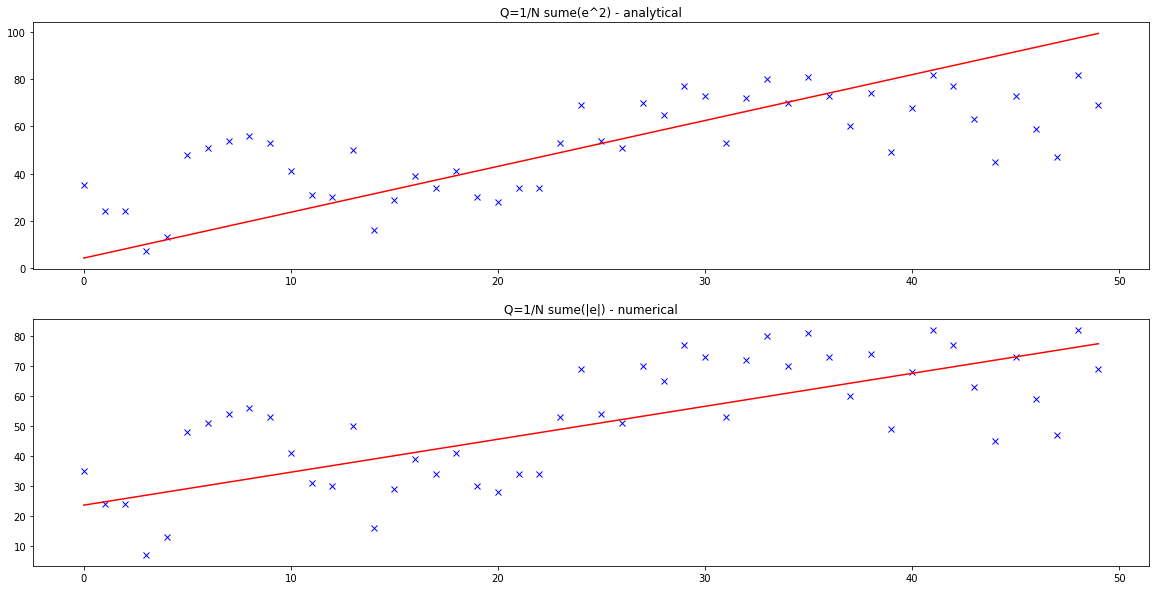

In [3]:
def draw_subplot(axis, x_list, y_list, y_result, title):
    axis.plot(x_list, y_list, 'b x')
    axis.plot(x_list, y_result, 'r')
    axis.set_title(title)


def print_result(x_list, y_list):
    y_analytical = get_result_for_analytical_method(x_list, y_list)
    y_numerical = get_result_for_numerical_method(x_list, y_list)

    analytical_title = "Q=1/N sume(e^2) - analytical"
    numerical_title = "Q=1/N sume(|e|) - numerical"
    fig, (ax1, ax2) = plt.subplots(2, figsize=(20, 10))
    draw_subplot(ax1, x_list, y_list, y_analytical, analytical_title)
    draw_subplot(ax2, x_list, y_list, y_numerical, numerical_title)
    plt.show()


xy_tup = make_test_data(50, 0, 50, 1)
print_result(xy_tup[0], xy_tup[1])